Read the cvs file and check the header

In [1]:
import pandas as pd
data = pd.read_csv('City_Employee_Payroll.csv')
data.head()

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (4,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,3-1000027830ctFu,2013,Police (LAPD),4301.0,1000027830,Police Detective II,Full Time,53.16,110998.08,24931.20,...,POLICE OFFICERS UNIT,70,2223,2,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2223.pdf
1,3-1000155488ctFu,2013,Police (LAPD),4302.0,1000155488,Clerk Typist,Full Time,23.77,49623.67,11343.96,...,CLERICAL UNIT,70,1358,0,10710.24,405.24,11.40,11126.88,City,http://per.lacity.org/perspecs/1358.pdf
2,3-1000194958ctFu,2013,Police (LAPD),4301.0,1000194958,Police Sergeant I,Full Time,60.80,126950.40,24184.00,...,POLICE OFFICERS UNIT,70,2227,1,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2227.pdf
3,3-1000198958ctFu,2013,Zoo,8701.0,1000198958,Light Equipment Operator,Full Time,30.23,63126.77,15319.59,...,EQUIP.OPER. & LABOR,87,3523,0,10710.24,405.24,11.40,11126.88,City,http://per.lacity.org/perspecs/3523.pdf
4,3-1000232317ctFu,2013,Police (LAPD),4301.0,1000232317,Police Lieutenant I,Full Time,60.98,127326.24,29391.20,...,POLICE OFFICERS UNIT,70,2232,1,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2232.pdf


Study the rate of change in the number of employeess over the years using bar chart

In [2]:
employee_year=data.groupby(['Year'], as_index=False).agg({"Row ID": "count"})
employee_year.head()

,Year,Row ID
0,2013,57379
1,2014,56948
2,2015,59767
3,2016,61009
4,2017,63919


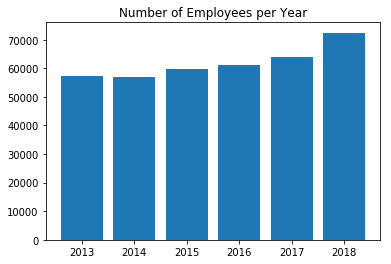

In [12]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
ind=employee_year.index
plt.bar(ind,employee_year['Row ID'])
plt.xticks(ind,employee_year.Year)
plt.title('Number of Employees per Year')
plt.show()

Chack which Employment type has a major impact on the change of the employees number

In [4]:
employee_year_type=data.groupby(['Year','Employment Type'], as_index=False).agg({"Row ID": "count"})
employee_year_type

,Year,Employment Type,Row ID
0,2013,Full Time,47030
1,2013,Part Time,10142
2,2013,Per Event,207
3,2014,Full Time,47267
4,2014,Part Time,9485
5,2014,Per Event,196
6,2015,Full Time,48444
7,2015,Part Time,11120
8,2015,Per Event,203
9,2016,Full Time,49728


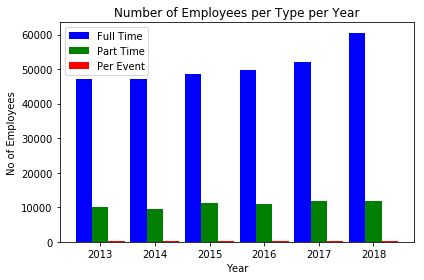

In [5]:
n_groups = 6

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 1

rects1 = plt.bar(index, employee_year_type[(employee_year_type['Employment Type']=='Full Time')]['Row ID'], bar_width,
alpha=opacity,
color='b',
label='Full Time')

rects2 = plt.bar(index + bar_width, employee_year_type[(employee_year_type['Employment Type']=='Part Time')]['Row ID'], bar_width,
alpha=opacity,
color='g',
label='Part Time')

rects2 = plt.bar(index + 2*bar_width, employee_year_type[(employee_year_type['Employment Type']=='Per Event')]['Row ID'], bar_width,
alpha=opacity,
color='r',
label='Per Event')

plt.xlabel('Year')
plt.ylabel('No of Employees')
plt.title('Number of Employees per Type per Year')
plt.xticks(index + bar_width, ('2013', '2014', '2015', '2016', '2017', '2018'))
plt.legend()

plt.tight_layout()
plt.show()

Do all department have the same level of change in employement over the years? For simplicity, I took the highest 3 of them.

In [6]:
employee_year_dep=data.groupby(['Year','Department Title'], as_index=False).agg({"Row ID": "count"})
employee_year_dep.head()

,Year,Department Title,Row ID
0,2013,Aging,46
1,2013,Airports (LAWA),3611
2,2013,Animal Services,348
3,2013,Building and Safety,870
4,2013,City Administrative Officer (CAO),127


In [7]:
data_dep = data.groupby(['Department Title'], as_index=False).agg({"Row ID": "count"})
data_dep.head()

,Department Title,Row ID
0,Aging,309
1,Airports,3889
2,Airports (LAWA),19562
3,Animal Services,2240
4,Building and Safety,6356


In [8]:
data_dep = data_dep.sort_values('Row ID',ascending=False).head(10).reset_index()
data_dep

,index,Department Title,Row ID
0,91,Water And Power (DWP),69604
1,78,Police (LAPD),68564
2,86,Recreation And Parks,40032
3,2,Airports (LAWA),19562
4,83,Public Works - Sanitation,19173
5,57,Fire (LAFD),18779
6,77,Police,13796
7,89,Transportation (LADOT),10425
8,58,General Services,10205
9,65,Library,9735


In [9]:
data_top = data[(data['Department Title'] == 'Water And Power (DWP)') | (data['Department Title'] == 'Police (LAPD)') | (data['Department Title'] == 'Recreation And Parks')]
data_top.head(10)

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,3-1000027830ctFu,2013,Police (LAPD),4301.0,1000027830,Police Detective II,Full Time,53.16,110998.08,24931.20,...,POLICE OFFICERS UNIT,70,2223,2,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2223.pdf
1,3-1000155488ctFu,2013,Police (LAPD),4302.0,1000155488,Clerk Typist,Full Time,23.77,49623.67,11343.96,...,CLERICAL UNIT,70,1358,0,10710.24,405.24,11.40,11126.88,City,http://per.lacity.org/perspecs/1358.pdf
2,3-1000194958ctFu,2013,Police (LAPD),4301.0,1000194958,Police Sergeant I,Full Time,60.80,126950.40,24184.00,...,POLICE OFFICERS UNIT,70,2227,1,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2227.pdf
4,3-1000232317ctFu,2013,Police (LAPD),4301.0,1000232317,Police Lieutenant I,Full Time,60.98,127326.24,29391.20,...,POLICE OFFICERS UNIT,70,2232,1,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2232.pdf
5,3-1000329284ctFu,2013,Police (LAPD),4302.0,1000329284,Principal Storekeeper,Full Time,45.06,94076.67,20813.00,...,SUPV BLUE COLLAR,70,1839,0,10710.24,405.24,11.40,11126.88,City,http://per.lacity.org/perspecs/1839.pdf
7,3-1000560683dwp941Fu,2013,Water And Power (DWP),NaN,1000560683,Construction Helper,Full Time,NaN,59278.32,19260.07,...,NaN,98,941,NaN,15860.53,1250.49,0.00,17111.02,DWP,http://per.lacity.org/perspecs/0941.pdf
8,3-1000674587dwp1835Fu,2013,Water And Power (DWP),NaN,1000674587,Storekeeper,Full Time,NaN,78613.20,25113.36,...,NaN,98,1835,NaN,15860.53,1250.49,0.00,17111.02,DWP,http://per.lacity.org/perspecs/1835.pdf
11,3-100077273dwp1336Fu,2013,Water And Power (DWP),NaN,100077273,Utility Executive Secretary,Full Time,NaN,70386.48,19147.12,...,NaN,98,1336,NaN,15860.53,1250.49,0.00,17111.02,DWP,http://per.lacity.org/perspecs/1336.pdf
12,3-1000839015dwp3711Fu,2013,Water And Power (DWP),NaN,1000839015,Equipment Mechanic,Full Time,NaN,87758.64,26001.54,...,NaN,98,3711,NaN,15860.53,1250.49,0.00,17111.02,DWP,http://per.lacity.org/perspecs/3711.pdf
13,3-1000863051ctPa,2013,Recreation And Parks,7903.0,1000863051,Pool Lifeguard,Part Time,16.46,34368.48,2617.76,...,SAFETY/SECURITY UNIT,88,2413,0,0.00,0.00,0.00,0.00,NaN,http://per.lacity.org/perspecs/2413.pdf


In [10]:
dep_top_year=data_top.groupby(['Year','Department Title'], as_index=False).agg({"Row ID": "count"})

dep_top_year = dep_top_year.drop(12) # I noticed that 2017 have some missing records, this issue to be checked with the project implementation
dep_top_year

,Year,Department Title,Row ID
0,2013,Police (LAPD),13431
1,2013,Recreation And Parks,6893
2,2013,Water And Power (DWP),10285
3,2014,Police (LAPD),13376
4,2014,Recreation And Parks,7120
5,2014,Water And Power (DWP),10736
6,2015,Police (LAPD),13420
7,2015,Recreation And Parks,7999
8,2015,Water And Power (DWP),11080
9,2016,Police (LAPD),13513


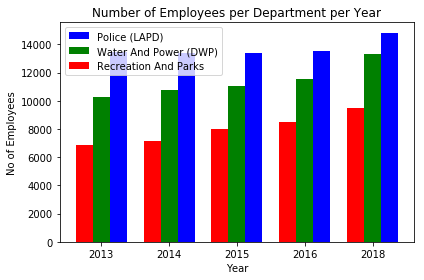

In [11]:
n_groups = 5

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 1
#The values are to be refrenced using indexing (later with full project implementation)
rects1 = plt.bar(index+ 2*bar_width, dep_top_year[(dep_top_year['Department Title']=='Police (LAPD)')]['Row ID'], bar_width,
alpha=opacity,
color='b',
label='Police (LAPD)')

rects2 = plt.bar(index + bar_width, dep_top_year[(dep_top_year['Department Title']=='Water And Power (DWP)')]['Row ID'], bar_width,
alpha=opacity,
color='g',
label='Water And Power (DWP)')

rects2 = plt.bar(index, dep_top_year[(dep_top_year['Department Title']=='Recreation And Parks')]['Row ID'], bar_width,
alpha=opacity,
color='r',
label='Recreation And Parks')

plt.xlabel('Year')
plt.ylabel('No of Employees')
plt.title('Number of Employees per Department per Year')
plt.xticks(index + bar_width, ('2013', '2014', '2015', '2016', '2018'))
plt.legend()

plt.tight_layout()
plt.show()

Comments: Both DWP and Recration and parks have steady increase over the years, While LAPD only has a singnifacnt increase between 2016-2018 (